In [81]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [82]:
happy = pd.read_csv('D:\DataTrained Projects\Project1\happiness_score.csv')
happy.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Our target column is Happiness Score 

In [83]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

There are no null values,
We have 3 types of columns
(9 are float datatype, 2 are object datatype, 1 is integer datatype)

In [84]:
happy.drop(['Country'],axis=1,inplace=True)

In [85]:
happy.drop(['Region'],axis=1,inplace=True)

We had dropped columns that doesn't provide much information regarding our analysis

In [86]:
happy.shape

(158, 10)

We have 158 rows and 10 columns after dropping 2 columns

In [87]:
happy.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Found that mean and 50% quatrile are mostly near and there are no outliers

In [88]:
happy.isnull().values.any()
happy.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no null values in dataset

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

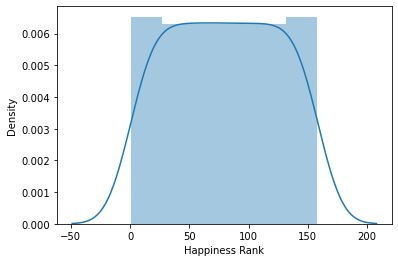

In [93]:
sns.distplot(happy['Happiness Rank'])

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

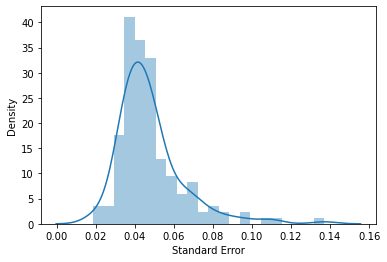

In [94]:
sns.distplot(happy['Standard Error'])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

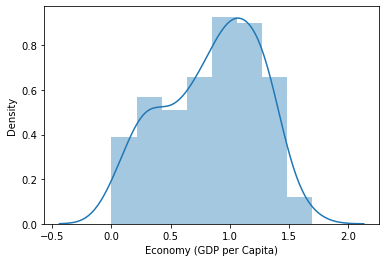

In [101]:
sns.distplot(happy['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

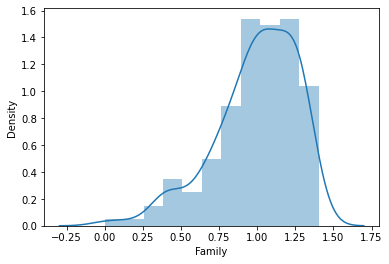

In [102]:
sns.distplot(happy['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

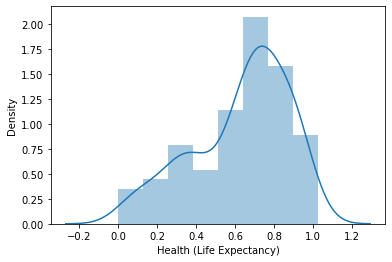

In [103]:
sns.distplot(happy['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

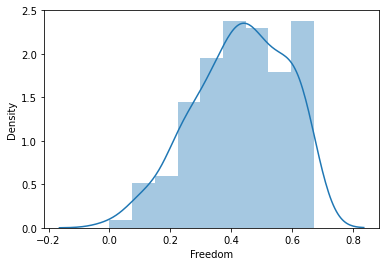

In [104]:
sns.distplot(happy['Freedom'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

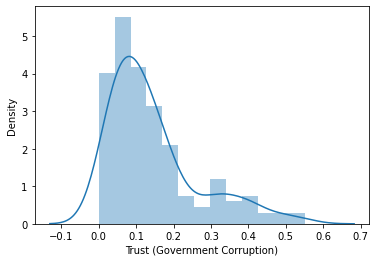

In [105]:
sns.distplot(happy['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

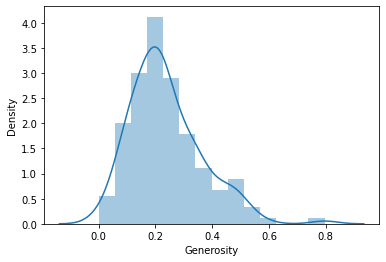

In [106]:
sns.distplot(happy['Generosity'])

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

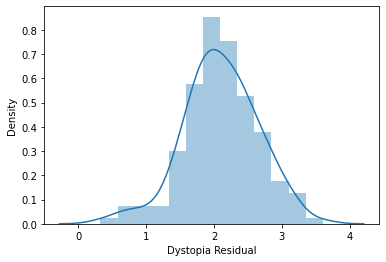

In [107]:
sns.distplot(happy['Dystopia Residual'])

In [42]:
corr_mat=happy.corr()
corr_mat

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


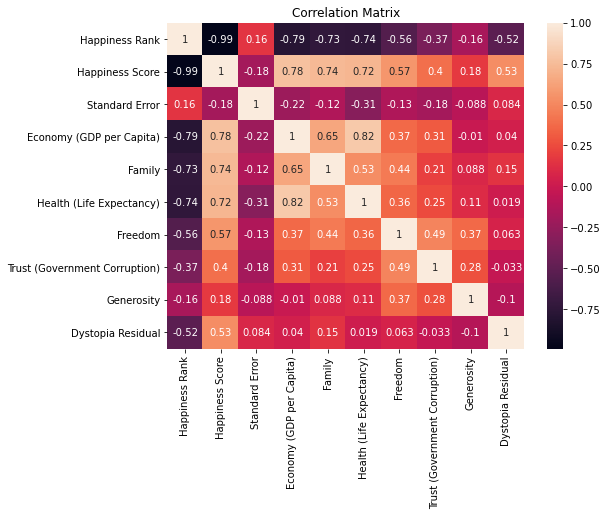

In [43]:
plt.figure(figsize=[8,6])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [44]:
corr_mat['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

From correlation matrix we can observe that every variable is having some realtion with target varible.

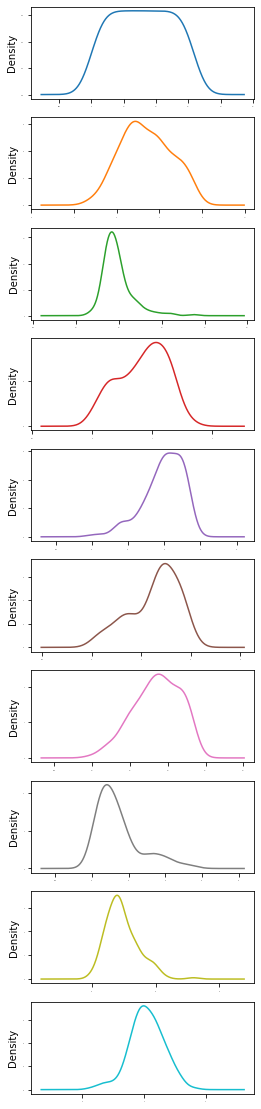

In [80]:
happy.plot(kind='density',subplots=True, sharex=False, legend=False, fontsize=1, figsize=[4,20])
plt.show()

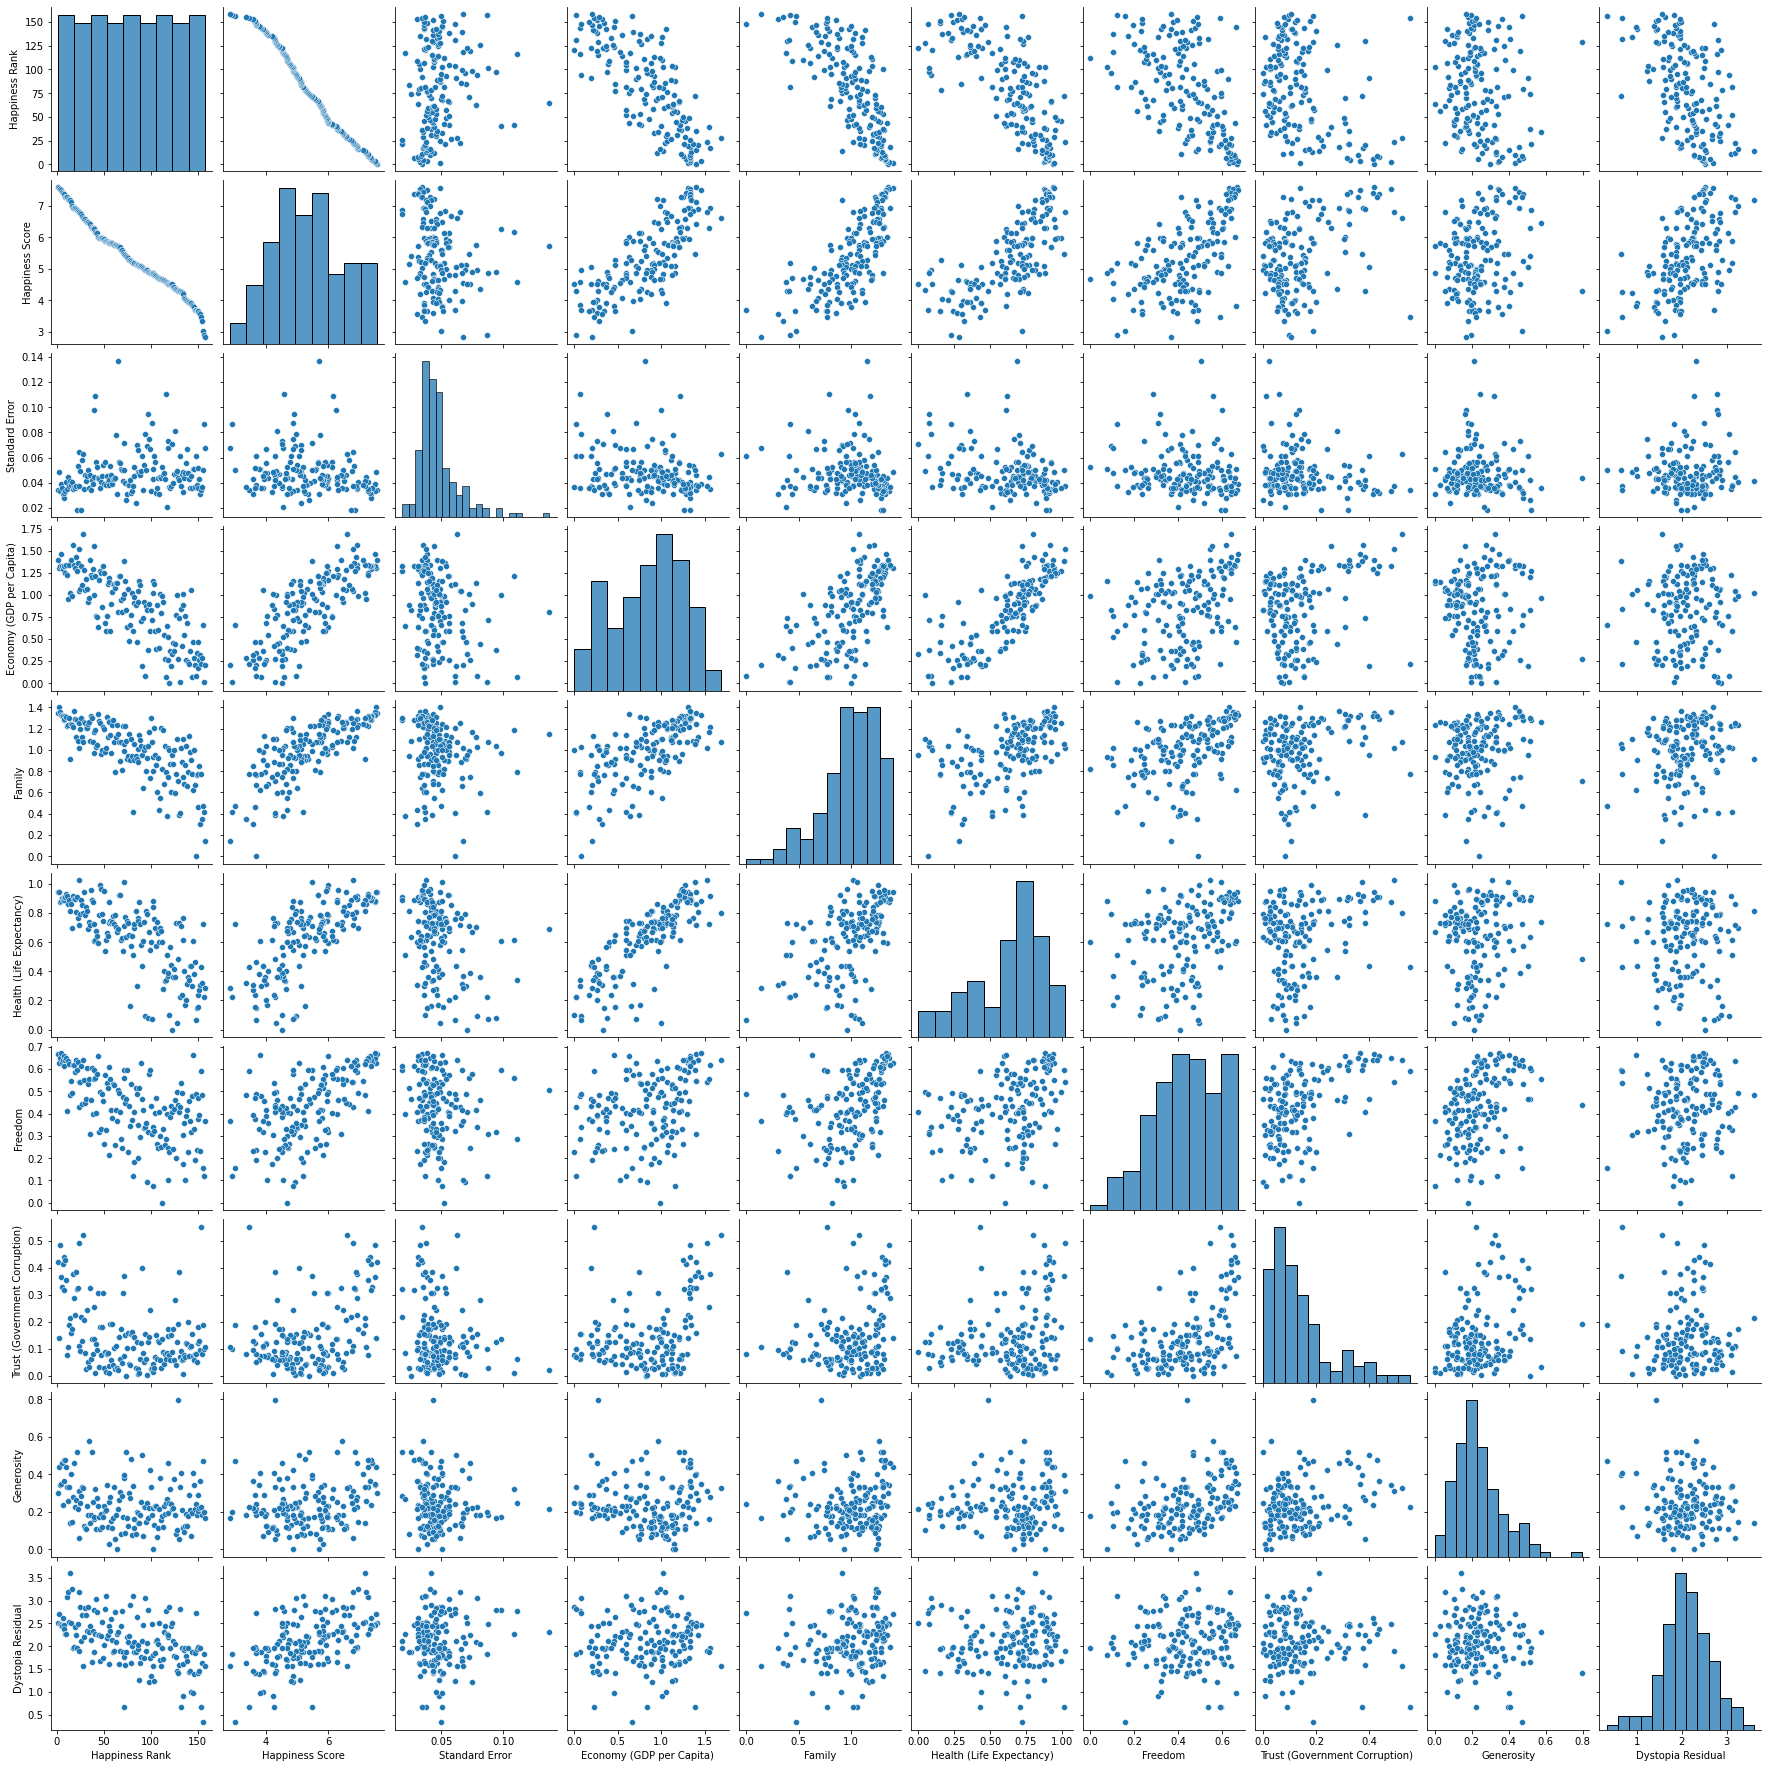

In [46]:
sns.pairplot(happy)
plt.show()

In [47]:
x=happy.drop('Happiness Score',axis=1)
y=happy['Happiness Score']

In [48]:
x.skew()

Happiness Rank                   0.000418
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

We can observe from distplot that there is skewness in data, we will remove skewness using power_transform function

In [49]:
from sklearn.preprocessing import power_transform
happy_new = power_transform(x)
happy_new = pd.DataFrame(happy_new,columns = x.columns)

In [50]:
happy_new.skew()

Happiness Rank                  -0.264365
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

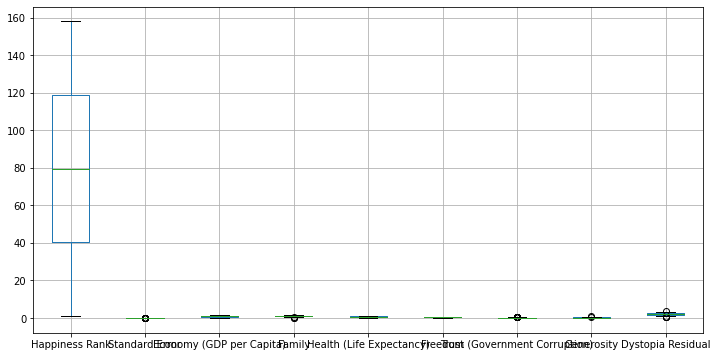

In [51]:
x.boxplot(figsize=[12,6])
plt.show()

We observe that there are no outliers in data

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=15)

In [70]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
r2_score(y_test, y_pred)

0.9999999252365187

In [71]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=10,random_state = 0 )
RFR.fit(x_train, y_train)
y_pred=RFR.predict(x_test)
r2_score(y_test, y_pred)

0.9886836492837919

In [72]:
from sklearn.svm import SVR

SVR_Reg = SVR(kernel = "rbf",degree=3, C=40)
SVR_Reg.fit(x_train, y_train)
y_pred = SVR_Reg.predict(x_test)
r2_score(y_test, y_pred)

0.9896682681167134

In [73]:
from sklearn.tree import DecisionTreeRegressor
RTD = DecisionTreeRegressor(random_state = 0)
RTD.fit(x_train, y_train)
y_pred = RTD.predict(x_test)
r2_score(y_test, y_pred)

0.9869498604711193

In [74]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(reg, x, y, cv=6)
print('Cross validation score of Linear Regression : ',scr.mean())

Cross validation score of Linear Regression :  0.9999971965439035


In [123]:
scr=cross_val_score(RFR, x, y, cv=6)
print('Cross validation score of RFR : ',scr.mean())

Cross validation score of RFR :  -1.3574162097546674


In [124]:
scr=cross_val_score(SVR_Reg, x, y, cv=6)
print('Cross validation score of SVR : ',scr.mean())

Cross validation score of SVR :  -0.2731230292581671


In [125]:
scr=cross_val_score(RTD, x, y, cv=6)
print('Cross validation score of RTD : ',scr.mean())

Cross validation score of RTD :  -1.8657849854463586


From all the above models we can find that the difference between cross validationa and linear regression model is minimum, 

so Linear Model with 0.99 r2 score is the best model

In [127]:
import joblib
joblib.dump(reg,'Happiness Score.pkl')

['Happiness Score.pkl']

Saved the model as Happiness Score